<a href="https://colab.research.google.com/github/NicoEssi/Machine_Learning_scikit-learn/blob/master/Logistic_Regression_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression - Demo


---

A logistic regression models the probability of a certain class or event existing (such as pass/fail, win/lose, alive/dead or healthy/sick). This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc... Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

Interestingly, its properties make it a very useful activation function for neural networks :)

## Pros

*   Convenient probability scores for observations
*   Multi-collinearity is not really an issue

## Cons

*   Doesn’t perform well when feature space is too large
*   Doesn’t handle large number of categorical features/variables well
*   Relies on transformations for non-linear features

---

## 1. Import dependencies and data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!wget https://github.com/NicoEssi/Machine_Learning_scikit-learn/raw/master/Social_Network_Ads.csv

## 2. Read CSV and inspect

In [0]:
data = pd.read_csv("Social_Network_Ads.csv")

X = data.iloc[:, [2, 3]]
y = data.iloc[:, 4].values

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 3. Split the data for training and testing

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## 4. Feature scale

In [0]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 5. Initialize and fit the logistic regression model

In [0]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 6. Predict with the trained model

In [0]:
y_predictions = classifier.predict(X_test)

## 7. Confusion matrix and visualization

In [0]:
from sklearn.metrics import confusion_matrix

confm = confusion_matrix(y_test, y_predictions)

confm

array([[68,  5],
       [ 8, 19]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


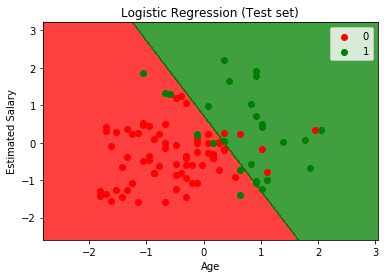

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()